In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [7]:
data = pd.read_csv(r"C:\MachineLearningProjects\Project1\Notebook\Data\StudentsPerformance.csv")

In [18]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [21]:
data.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
data = data.rename(columns={
    'race/ethnicity':'race_ethnicity',
    'parental level of education':'parental_level_of_education',
    'test preparation course':'test_preparation_course',
    'math score':'math_score',
    'reading score':'reading_score',
    'writing score':'writing_score'

})

In [24]:
print("catgerocial in gender variable ",end = "")
print(data['gender'].unique())

print("catgerocial in race_ethnicity variable ",end = "")
print(data['race_ethnicity'].unique())

print("catgerocial in parental_level_of_education",end = "")
print(data['parental_level_of_education'].unique())

print("catgerocial in lunch	 ",end = "")
print(data['lunch'].unique())

print("catgerocial in test_preparation_course	 ",end = "")
print(data['test_preparation_course'].unique())






catgerocial in gender variable ['female' 'male']
catgerocial in race_ethnicity variable ['group B' 'group C' 'group A' 'group D' 'group E']
catgerocial in parental_level_of_education["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
catgerocial in lunch	 ['standard' 'free/reduced']
catgerocial in test_preparation_course	 ['none' 'completed']


In [25]:
numerical_features = [features for features in data.columns if data[features].dtype != 'O']
catgorical_features = [features for features in data.columns if data[features].dtype == 'O']


print("numerical features in the data :",numerical_features)
print("catgorical features in the data:",catgorical_features )

numerical features in the data : ['math_score', 'reading_score', 'writing_score']
catgorical features in the data: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [27]:
data['Total_Score']= data['math_score']+data['reading_score']+data['writing_score']
data['Average']=data['Total_Score']/3

In [28]:
data.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [29]:
reading_full = data[data['reading_score'] == 100]['Average'].count()
writing_full = data[data['writing_score'] == 100]['Average'].count()
Maths_full   = data[data['math_score'] == 100]['Average'].count()

print(reading_full)
print(writing_full)
print(Maths_full)

17
14
7


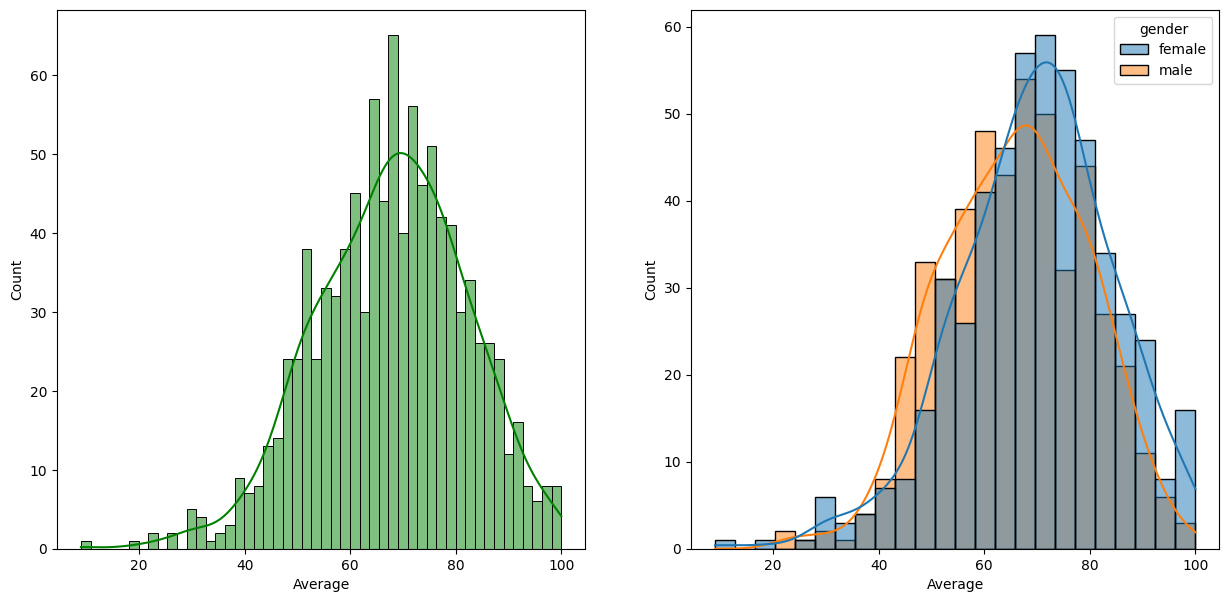

In [39]:
fig, axs = plt.subplots(1,2, figsize =(15,7))
plt.subplot(121)
sns.histplot(data = data, x= "Average",bins=50,kde = True,color='g')
plt.subplot(122)
sns.histplot(data = data, x= "Average",kde = True,hue='gender',color='b')
plt.show()